In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

result = pd.DataFrame()

In [ ]:
def processData(filename):
  #read input file
  df2007 = pd.read_csv(filename, encoding="utf8")
  #extract day,month and year from "Date Local"
  df2007['month'] = pd.DatetimeIndex(df2007['Date Local']).month
  df2007['day'] = pd.DatetimeIndex(df2007['Date Local']).day
  df2007['year'] = pd.DatetimeIndex(df2007['Date Local']).year
  #Remove duplicated and null values
  df2007 = df2007.dropna()
  df2007 = df2007.drop_duplicates()
  #remove unnecessary columns
  df2007 = df2007.drop(columns=['Observation Percent'])
  #Keep state code in int format only
  df2007['State Code'] = pd.to_numeric(df2007['State Code'])
  #encode event type
  le = preprocessing.LabelEncoder()
  df2007['Event Type'] = le.fit_transform(df2007['Event Type'])
  return df2007

**Read data from 2000-2017, preprocess and form training set.**

In [ ]:
result = pd.concat(
    map(processData, ['/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2000.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2001.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2002.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2003.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2004.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2005.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2006.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2007.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2008.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2009.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2010.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2011.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2012.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2013.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2014.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2015.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2016.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2017.csv'
                      ]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/p

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122830 entries, 0 to 2122829
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   State Code           int64  
 1   County Code          int64  
 2   Site Num             int64  
 3   Parameter Code       int64  
 4   POC                  int64  
 5   Latitude             float64
 6   Longitude            float64
 7   Datum                object 
 8   Parameter Name       object 
 9   Sample Duration      object 
 10  Pollutant Standard   object 
 11  Date Local           object 
 12  Units of Measure     object 
 13  Event Type           int64  
 14  Observation Count    int64  
 15  Arithmetic Mean      float64
 16  1st Max Value        float64
 17  1st Max Hour         int64  
 18  AQI                  float64
 19  Method Code          float64
 20  Method Name          object 
 21  Local Site Name      object 
 22  Address              object 
 23  State Name           object 
 24

In [ ]:
testdata = pd.DataFrame()

**Read data from 22018-2020, preprocess and form test data.**

In [ ]:
testdata = pd.concat(
    map(processData, [
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2018.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2019.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2020.csv'
                      ]), ignore_index=True)

In [ ]:
result.to_csv('/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/PM2.5_18yearDailySummary.csv')

In [ ]:
testdata.to_csv('/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/PM2.5_testdata.csv')

In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224624 entries, 0 to 224623
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           224624 non-null  int64  
 1   County Code          224624 non-null  int64  
 2   Site Num             224624 non-null  int64  
 3   Parameter Code       224624 non-null  int64  
 4   POC                  224624 non-null  int64  
 5   Latitude             224624 non-null  float64
 6   Longitude            224624 non-null  float64
 7   Datum                224624 non-null  object 
 8   Parameter Name       224624 non-null  object 
 9   Sample Duration      224624 non-null  object 
 10  Pollutant Standard   224624 non-null  object 
 11  Date Local           224624 non-null  object 
 12  Units of Measure     224624 non-null  object 
 13  Event Type           224624 non-null  int64  
 14  Observation Count    224624 non-null  int64  
 15  Arithmetic Mean  

In [ ]:
result['Event Type'].value_counts()

1    2094186
0      28644
Name: Event Type, dtype: int64

1. Encode "Event Type"
2. Drop Observation Percent

In [ ]:
result = result.select_dtypes(exclude=['object'])

**used daily summary data from 2000 to 2017 as training data**

In [ ]:
X_train = result.drop(['AQI'], axis=1).values
Y_train = result['AQI'].values

**used daily summary data of 2018, 2019 and 2020 as test data**

In [ ]:

testdata = testdata.select_dtypes(exclude=['object'])

In [ ]:
X_test = testdata.drop(['AQI'], axis=1).values
Y_test = testdata['AQI'].values

**Pick n_estimator where accuracy for test data stabilizes**

In [ ]:
test_score=[]
from sklearn.ensemble import GradientBoostingRegressor
for i in (5,10,20,30,40,50,70,100):
  grb = GradientBoostingRegressor(n_estimators=i)
  grb.fit(X_train, Y_train)
  test_score.append(grb.score(X_test, Y_test))

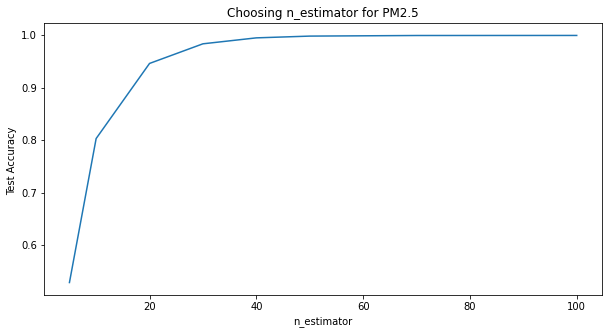

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=[5,10,20,30,40,50,70,100], y=test_score)
plt.ylabel('Test Accuracy ')
plt.xlabel('n_estimator')
plt.title('Choosing n_estimator for PM2.5')
plt.show()

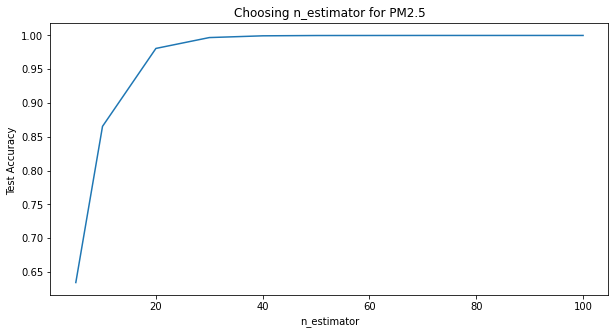

In [ ]:

plt.figure(figsize=(10,5))
sns.lineplot(x=[5,10,20,30,40,50,70,100], y=test_score)
plt.ylabel('Train Accuracy ')
plt.xlabel('n_estimator')
plt.title('Choosing n_estimator for PM2.5')
plt.show()

**Train Gradient Boosting Regressor with n_estimator 40**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(n_estimators=40)
grb.fit(X_train, Y_train)
print(grb.score(X_train, Y_train))

0.9994149971805905


**Predicted AQI for test data with 99.5% accuracy**

In [ ]:
accuracy = grb.score(X_test, Y_test)
print("Accuracy on test data: %.6f" % accuracy)

Accuracy on test data: 0.995248


In [ ]:
predicted_AQI = grb.predict(X_test)

In [ ]:
predictedResult = testdata.drop(['AQI'], axis=1)
predictedResult = predictedResult.reset_index()

In [ ]:
pd.DataFrame(predicted_AQI).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224624 entries, 0 to 224623
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       224624 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [ ]:
predictedResult

,index,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Event Type,Observation Count,Arithmetic Mean,1st Max Value,1st Max Hour,Method Code,month,day,year
0,0,1,3,10,88101,1,30.497478,-87.880258,1,1,7.6,7.6,0,145.0,1,2,2018
1,1,1,3,10,88101,1,30.497478,-87.880258,1,1,8.1,8.1,0,145.0,1,5,2018
2,2,1,3,10,88101,1,30.497478,-87.880258,1,1,3.6,3.6,0,145.0,1,8,2018
3,3,1,3,10,88101,1,30.497478,-87.880258,1,1,4.5,4.5,0,145.0,1,11,2018
4,4,1,3,10,88101,1,30.497478,-87.880258,1,1,6.0,6.0,0,145.0,1,14,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224619,224619,72,113,4,88101,1,18.009558,-66.627249,1,1,6.0,6.0,0,545.0,12,17,2020
224620,224620,72,113,4,88101,1,18.009558,-66.627249,1,1,4.3,4.3,0,545.0,12,20,2020
224621,224621,72,113,4,88101,1,18.009558,-66.627249,1,1,6.6,6.6,0,545.0,12,23,2020
224622,224622,72,113,4,88101,1,18.009558,-66.627249,1,1,2.6,2.6,0,545.0,12,26,2020


In [ ]:
predictedResult = predictedResult.join(pd.DataFrame({'AQI predicted':predicted_AQI}))

In [ ]:
predictedResult

,index,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Event Type,Observation Count,Arithmetic Mean,1st Max Value,1st Max Hour,Method Code,month,day,year,AQI predicted
0,0,1,3,10,88101,1,30.497478,-87.880258,1,1,7.6,7.6,0,145.0,1,2,2018,32.350743
1,1,1,3,10,88101,1,30.497478,-87.880258,1,1,8.1,8.1,0,145.0,1,5,2018,34.262689
2,2,1,3,10,88101,1,30.497478,-87.880258,1,1,3.6,3.6,0,145.0,1,8,2018,16.198026
3,3,1,3,10,88101,1,30.497478,-87.880258,1,1,4.5,4.5,0,145.0,1,11,2018,19.920814
4,4,1,3,10,88101,1,30.497478,-87.880258,1,1,6.0,6.0,0,145.0,1,14,2018,25.563788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224619,224619,72,113,4,88101,1,18.009558,-66.627249,1,1,6.0,6.0,0,545.0,12,17,2020,25.563788
224620,224620,72,113,4,88101,1,18.009558,-66.627249,1,1,4.3,4.3,0,545.0,12,20,2020,19.094823
224621,224621,72,113,4,88101,1,18.009558,-66.627249,1,1,6.6,6.6,0,545.0,12,23,2020,28.475392
224622,224622,72,113,4,88101,1,18.009558,-66.627249,1,1,2.6,2.6,0,545.0,12,26,2020,12.591978


**Write predicted AQI with other details for further analysis and visualization**

In [ ]:
newPM = predictedResult[['State Code','County Code','Site Num','Latitude','Longitude','month','day','year','AQI predicted']]

In [ ]:
newPM.to_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/PM2.5_AQI_Predicted")

In [ ]:
predictedResult = predictedResult.drop(columns=['index'])

In [ ]:

column = predictedResult['AQI predicted']
max_value = column.max()
max_value

249.82426240282533

In [ ]:
predictedResult.sort_values(by='AQI predicted', ascending=False)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Event Type,Observation Count,Arithmetic Mean,1st Max Value,1st Max Hour,Method Code,month,day,year,AQI predicted
207767,41,39,2013,88101,1,43.744352,-122.480487,1,1,280.5,280.5,0,145.0,9,14,2020,249.824262
207957,41,39,9004,88101,1,43.799501,-123.053487,1,1,341.4,341.4,0,145.0,9,9,2020,249.824262
206984,41,13,100,88101,1,44.299787,-120.844773,1,1,593.0,593.0,0,145.0,9,12,2020,249.824262
208196,41,67,4,88101,1,45.528501,-122.972398,1,1,297.0,297.0,0,145.0,9,15,2020,249.824262
86846,2,90,35,88101,1,64.762973,-147.310297,0,1,314.5,314.5,0,145.0,7,7,2019,249.824262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151855,49,3,3,88101,1,41.492707,-112.018863,1,1,1.0,1.0,0,145.0,3,8,2019,8.283242
114228,19,153,30,88101,1,41.603159,-93.643118,1,1,1.0,1.0,0,145.0,10,2,2019,8.283242
151860,49,3,3,88101,1,41.492707,-112.018863,1,1,1.2,1.2,0,145.0,3,13,2019,8.283242
151871,49,3,3,88101,1,41.492707,-112.018863,1,1,1.1,1.1,0,145.0,3,30,2019,8.283242


AQI for each county per month

In [ ]:
countyResult = predictedResult.groupby(['State Code','County Code','year','month']).agg({"AQI predicted":['mean']})
countyResult.columns = ['AQI']
countyResult.reset_index()

,State Code,County Code,year,month,AQI
0,1,3,2018,1,27.132169
1,1,3,2018,2,23.686517
2,1,3,2018,3,31.637314
3,1,3,2018,4,30.200925
4,1,3,2018,5,34.013924
...,...,...,...,...,...
12298,72,113,2020,8,31.797282
12299,72,113,2020,9,38.344697
12300,72,113,2020,10,29.253521
12301,72,113,2020,11,21.573622


In [ ]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#kfold = KFold(n_splits=10)
#results = cross_val_score(grb, X_train, Y_train, cv=kfold)